In [3]:
import pandas as pd

In [4]:
df_weather = pd.read_csv('./data/weather_data_eng.csv')
df_weather.info()

/var/folders/sg/hlv7r8p13tj6dbrhj1phzxlm0000gn/T/ipykernel_38590/1413179625.py:1: DtypeWarning: Columns (4,7,8,9,11,12,16,24,27,29,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv('./data/weather_data_eng.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450000 entries, 0 to 2449999
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      object 
 1   type                    object 
 2   longitude               float64
 3   latitude                float64
 4   TEMP_FLAG               object 
 5   HUMIDEX_FLAG            float64
 6   LOCAL_MONTH             int64  
 7   PRECIP_AMOUNT_FLAG      object 
 8   WINDCHILL_FLAG          object 
 9   WIND_SPEED_FLAG         object 
 10  LOCAL_DATE              object 
 11  RELATIVE_HUMIDITY_FLAG  object 
 12  WEATHER_ENG_DESC        object 
 13  LOCAL_HOUR              int64  
 14  RELATIVE_HUMIDITY       float64
 15  LOCAL_DAY               int64  
 16  STATION_PRESSURE_FLAG   object 
 17  WIND_SPEED              float64
 18  VISIBILITY              float64
 19  LOCAL_YEAR              int64  
 20  UTC_DAY                 int64  
 21  TEMP                    float64

In [5]:
WIND_SPEED_THRESHOLD = 50.0
# > 50 km/h is considered Wind storm
SNOW_PRECIP_THRESHOLD = 30.0
# > 30 mm is considered Snow storm
RAIN_PRECIP_THRESHOLD = 20.0
# > 20 mm is considered Rain storm
"""
severe_wind_days = combined_df[combined_df['WIND_SPEED']
                               > WIND_SPEED_THRESHOLD]

winter_storm_days = combined_df[(combined_df['type'] == 'snow') & (
    combined_df['PRECIP_AMOUNT'] >= SNOW_PRECIP_THRESHOLD)]

rainny_storm = combined_df[(combined_df['type'] == 'rain') & (combined_df['PRECIP_AMOUNT'] >= RAIN_PRECIP_THRESHOLD)]
"""

storm_severe = df_weather[df_weather['WIND_SPEED'] > WIND_SPEED_THRESHOLD]
snow_severe = df_weather[(df_weather['WEATHER_ENG_DESC'].str.contains('snow')) & (
    df_weather['PRECIP_AMOUNT'] >= SNOW_PRECIP_THRESHOLD)]
rain_severe = df_weather[(df_weather['WEATHER_ENG_DESC'].str.contains('rain')) & (df_weather['PRECIP_AMOUNT'] >= RAIN_PRECIP_THRESHOLD)]

In [6]:
storm_severe.head()
storm_severe.to_csv('./storm_severe.csv', index=False)


In [7]:
snow_severe.head()
snow_severe.to_csv('./snow_severe.csv', index=False)

In [8]:
weather_eng_desc_unique = df_weather['WEATHER_ENG_DESC'].unique()
# Print each unique value line by line
for value in weather_eng_desc_unique:
    if isinstance(value, str) and 'Snow' in value:
        print(value)

Snow,Fog
Snow
Snow,Blowing Snow
Snow,Ice Pellets
Snow Showers
Snow Showers,Blowing Snow
Moderate Snow
Ice Pellet Showers,Snow Showers
Moderate Snow Showers
Snow,Ice Pellets,Fog
Rain,Snow
Rain,Snow,Fog
Snow Showers,Fog
Freezing Rain,Snow Pellets
Freezing Drizzle,Snow Pellets
Freezing Drizzle,Snow
Moderate Snow,Freezing Fog
Heavy Snow
Drizzle,Snow,Fog
Heavy Snow Showers
Snow Pellets
Rain Showers,Snow Pellets
Rain Showers,Snow Showers
Ice Pellet Showers,Snow Showers,Fog
Blowing Snow
Snow Grains
Snow Showers,Snow Pellets
Freezing Rain,Snow
Heavy Snow Showers,Blowing Snow
Snow,Snow Grains
Freezing Rain,Snow,Fog
Snow Grains,Fog
Moderate Snow,Blowing Snow
Moderate Snow Showers,Blowing Snow
Freezing Drizzle,Snow,Fog
Snow,Snow Showers
Freezing Rain,Ice Pellets,Blowing Snow
Snow,Ice Pellets,Blowing Snow
Rain Showers,Snow Showers,Fog
Freezing Drizzle,Snow,Blowing Snow
Freezing Rain,Snow,Ice Pellets
Rain,Snow Pellets
Snow Showers,Snow Pellets,Blowing Snow
Freezing Rain,Snow Showers
Drizzle,Snow
Fr

In [9]:
snow_rows = df_weather[df_weather['WEATHER_ENG_DESC'].notna() & df_weather['WEATHER_ENG_DESC'].str.contains('Snow')]
snow_rows.head()

,id,type,longitude,latitude,TEMP_FLAG,HUMIDEX_FLAG,LOCAL_MONTH,PRECIP_AMOUNT_FLAG,WINDCHILL_FLAG,WIND_SPEED_FLAG,...,DEW_POINT_TEMP_FLAG,UTC_YEAR,UTC_MONTH,STATION_PRESSURE,WIND_DIRECTION,STATION_NAME,PRECIP_AMOUNT,VISIBILITY_FLAG,UTC_DATE,WEATHER_FRE_DESC
689,6158875.2016.10.27.11,Feature,-77.528056,44.118889,NaN,NaN,10,NaN,NaN,NaN,...,NaN,2016,10,101.09,7.0,TRENTON A,NaN,NaN,2016-10-27T16:00:00,"Neige,Brouillard"
690,6158875.2016.10.27.12,Feature,-77.528056,44.118889,NaN,NaN,10,NaN,NaN,NaN,...,NaN,2016,10,100.97,7.0,TRENTON A,NaN,NaN,2016-10-27T17:00:00,"Neige,Brouillard"
691,6158875.2016.10.27.13,Feature,-77.528056,44.118889,NaN,NaN,10,NaN,NaN,NaN,...,NaN,2016,10,100.80,7.0,TRENTON A,NaN,NaN,2016-10-27T18:00:00,"Neige,Brouillard"
1265,6158875.2016.11.20.11,Feature,-77.528056,44.118889,NaN,NaN,11,NaN,NaN,NaN,...,NaN,2016,11,99.22,33.0,TRENTON A,NaN,NaN,2016-11-20T16:00:00,Neige
1266,6158875.2016.11.20.12,Feature,-77.528056,44.118889,NaN,NaN,11,NaN,NaN,NaN,...,NaN,2016,11,99.19,30.0,TRENTON A,NaN,NaN,2016-11-20T17:00:00,Neige


In [10]:
snow_rows.to_csv('./snow_rows.csv', index=False)

In [11]:
rain_rows = df_weather[df_weather['WEATHER_ENG_DESC'].notna() & df_weather['WEATHER_ENG_DESC'].str.contains('Rain')]
rain_rows.head()
rain_rows.to_csv('./rain_rows.csv', index=False)

In [12]:
max_wind_guts = storm_severe.groupby(['LOCAL_DATE', 'STATION_NAME'])['WIND_SPEED'].max()
max_wind_guts.head()

LOCAL_DATE           STATION_NAME  
2016-01-10 11:00:00  CHATHAM KENT      52.0
2016-01-10 13:00:00  CHATHAM KENT      58.0
2016-01-10 14:00:00  CHATHAM KENT      58.0
2016-01-10 16:00:00  TORONTO INTL A    57.0
2016-01-10 17:00:00  TORONTO INTL A    52.0
Name: WIND_SPEED, dtype: float64

In [13]:
stations_with_highest_wind_gusts = storm_severe.groupby(['STATION_NAME'])['WIND_SPEED'].max()
stations_with_highest_wind_gusts.head()

STATION_NAME
BIG TROUT LAKE            54.0
BIG TROUT LAKE A          58.0
BURLINGTON PIERS (AUT)    57.0
CAMERON FALLS (AUT)       59.0
CARIBOU ISLAND (AUT)      77.0
Name: WIND_SPEED, dtype: float64

In [14]:
filter_snow_rows = snow_rows[snow_rows['UTC_YEAR'] > 2021]

stations_with_highest_snow = filter_snow_rows.groupby(['LOCAL_DATE', 'STATION_NAME', 'longitude', 'latitude', 'TEMP'])['PRECIP_AMOUNT'].max()
stations_with_highest_snow.head()

LOCAL_DATE           STATION_NAME         longitude   latitude   TEMP
2022-01-01 19:00:00  KITCHENER/WATERLOO   -80.378611  43.460833  -0.3    0.0
2022-01-01 20:00:00  KITCHENER/WATERLOO   -80.378611  43.460833  -1.6    0.2
                     TORONTO CITY CENTRE  -79.396111  43.627500   0.9    0.2
                     TRENTON A            -77.528056  44.118889   1.3    NaN
2022-01-01 21:00:00  KITCHENER/WATERLOO   -80.378611  43.460833  -2.4    0.0
Name: PRECIP_AMOUNT, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

              LOCAL_DATE         STATION_NAME  longitude  latitude  UTC_YEAR  \
265  2022-04-01 12:00:00  TORONTO CITY CENTRE -79.396111   43.6275      2022   
263  2022-04-01 06:00:00  TORONTO CITY CENTRE -79.396111   43.6275      2022   
310  2022-12-15 19:00:00  TORONTO CITY CENTRE -79.396111   43.6275      2022   
268  2022-04-27 02:00:00  TORONTO CITY CENTRE -79.396111   43.6275      2022   
212  2022-03-07 18:00:00  TORONTO CITY CENTRE -79.396111   43.6275      2022   

     TEMP  
265   2.4  
263   1.8  
310   1.6  
268   1.5  
212   1.4  


/var/folders/sg/hlv7r8p13tj6dbrhj1phzxlm0000gn/T/ipykernel_38590/3994941031.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=max_snow_toronto_sorted, x='TEMP', y='UTC_YEAR', palette='viridis', size='TEMP')


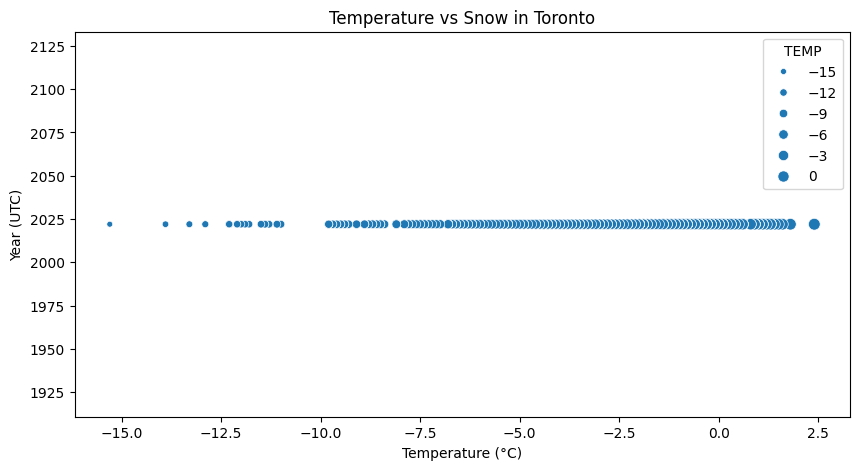

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Toronto stations and years greater than 2021
filter_location_toronto = snow_rows[(snow_rows['STATION_NAME'].str.contains('TORONTO')) & (snow_rows['UTC_YEAR'] > 2021)]

# Group by date, station, longitude, and latitude, then find the maximum temperature for each group
max_snow_toronto = filter_location_toronto.groupby(['LOCAL_DATE', 'STATION_NAME', 'longitude', 'latitude', 'UTC_YEAR'])['TEMP'].max().reset_index()

# Sort the DataFrame by temperature in descending order
max_snow_toronto_sorted = max_snow_toronto.sort_values(by='TEMP', ascending=False)

# Display the first few rows
print(max_snow_toronto_sorted.head())

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=max_snow_toronto_sorted, x='TEMP', y='UTC_YEAR', palette='viridis', size='TEMP')
plt.title('Temperature vs Snow in Toronto')
plt.xlabel('Temperature (°C)')
plt.ylabel('Year (UTC)')
plt.show()


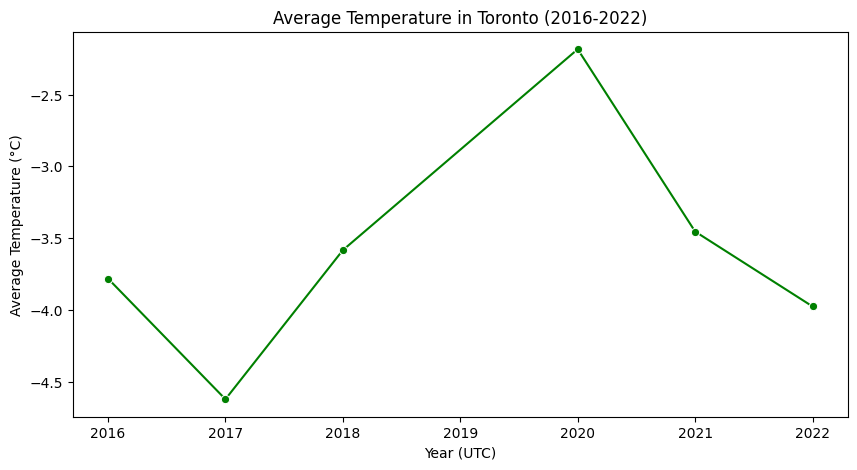

In [35]:


# Filter data for Toronto stations and years between 2016 and 2022
filter_location_toronto = snow_rows[(snow_rows['STATION_NAME'].str.contains('TORONTO')) & (snow_rows['UTC_YEAR'].between(2016, 2022))]

# Group by year and calculate the average temperature for each year
average_temp_by_year = filter_location_toronto.groupby('UTC_YEAR')['TEMP'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_temp_by_year, x='UTC_YEAR', y='TEMP', marker='o', color='green')
plt.title('Average Temperature in Toronto (2016-2022)')
plt.xlabel('Year (UTC)')
plt.ylabel('Average Temperature (°C)')
plt.show()
